Important terms:
- Independent variables : the factors that we hypothesize have an impact on our dependent variable
- Denpendent variables : the main factor that we are trying to understand and predict
- Pearson correlation coefficient : a measure of the linear correlation between two variables X and Y, it has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation
- coefficient of determination : a measure in statistics that assesses how a model predicts or explains an outcome in the linear regression setting
- multicollinearity (also collinearity) : is a phenomenon in which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy 

Final goal: find the underlaying relationship between indepedent variable(s) and dependent variable(s)
- subtask 1 : what's the PROPER method that we should take?
    - For different approaches, what's its typical use scenario?
    - What should we do if two or more techs has similar perfomance?
- subtaks 2 : how to select the independent variables and dependent variables  (dependent variable(s) are mostlikely choosen by the end user)
    - significance test? (This method might be helpful when moving out the unrelated independent variables)
    - correlation cofficient ?
    - Stepsize regression

**<font color = red>Regression Analysis</font>**:  
regression analysis is a set of statistical processes for estimating the relationships between a dependent variable and one or more independent variables. The most common form of regression analysis is linear regression,  in which we find the line (or a more complex linear function) that most closely fits the data according to a specific mathematical criterion.
There are 3 criterions can help us classify different regression analysis techs: number of independent variables, type of dependet variables and the shape of regression line. Based on the final regression line, we can split all these regression techs into following two subparts (here we only list some widely used methods): 
- Linear regression  
The dependent variable is continuous, independent variable(s) can be continuous or discrete, and nature of regression line is linear, linear regression establishes a relationship between dependent variable (Y) and one or more independent variables (X) using a best fit straight line (also known as regression line).
    - Simple linear regression 
        - Only one independent variable exists
        - There must have a linear correlation between the independent variable and dependent variable
        - Very sensitive to outliers which can terribly affect the regression line and eventually the forecasted values.
        - Use R^2 to evaluate the model performance
    - Multiple linear regression 
        - Compared with the simple linear regression, we handle serveral independent variables
        - Multicollinearity, autocorrelation and heteroscedasticity have negative impact on the model
        - In case of multiple independent variables, we can go with forward selection, backward elimination and step wise approach for selection of most significant independent variables
            - Standard stepwise regression does two things. It adds and removes predictors as needed for each step
            - Forward selection starts with most significant predictor in the model and adds variable for each step
            - Backward elimination starts with all predictors in the model and removes the least significant variable for each step 
            
- Non-linear regression
    - Logistic regression
        - Often used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick and so on. Generally speaking, logistic regression classifier is a binary classifier.
        - Logistic regression use non-linear logarithmic transformation, so having a linear correaltion between indenpendent variables and dependent variables is not a mandatory requirment anymore.
        - In order to prvent underfitting and overfitting, we should guarantee that every independet variable we use is significant (better pick every meaningful variable use some selection techs e.g. stepwise regression)
        - Training set need to be large enough since maximum likelihood estimation perform not so well on training set with small size
        - Independent variables shouldn't have correlations in themselves, i.e., multicollinearity is not allowed
    - Polynomial regression
        - The relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x 
        - While there might be a temptation to fit a higher degree polynomial to get lower error, this can result in over-fitting. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem

In [400]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math

In [417]:
# create a dataframe with random value, split it into training set and testing set
np.random.seed(374639) 
# df = pd.DataFrame(np.random.randint(0,1000,size=(100, 5)), columns=list('ABCDE'))
df = pd.DataFrame(np.random.randn(100,5),columns=list('ABCDE'))
X = df.iloc[:,:-1].values
y = df.iloc[:,4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=374639)

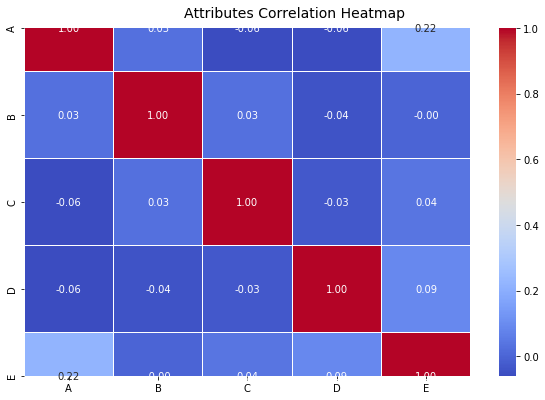

In [402]:
# correlation matrix heatmap 
# this is a meaningful method to varify whether there are some linear correlations of given features
f, ax = plt.subplots(figsize=(10, 6))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Attributes Correlation Heatmap', fontsize=14)

As we can see from above results, if we set the feature 'E' as the target, it has barly linear correlation with other indenpendent feature,(that's true, because the data is randomly generated, we can't guarantee a clearly linear correlation between some features), so a linear regression might don't make sense. Anyway let's see the result...

In [403]:
# train a linear regression classifier 
print('Start training...')
lin_reg = LinearRegression()
lin_model = lin_reg.fit(X_train,y_train)
lin_train_predicted = lin_reg.predict(X_train)
lin_test_predicted = lin_reg.predict(X_test)
print('Training is done!')

Start training...
Training is done!


In [404]:
# calculate mean squared error and r^2 value
lin_rmse_train = np.sqrt(mean_squared_error(y_train,lin_train_predicted))
lin_r2_train = r2_score(y_train,linear_predicted)

lin_rmse_test = np.sqrt(mean_squared_error(y_test,lin_test_predicted))
lin_r2_test = r2_score(y_test, lin_test_predicted)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(lin_rmse_train))
print("R2 score of training set is {}".format(lin_r2_train))
  
print("\n")
  
print("The model performance for the testing set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(lin_rmse_test))
print("R2 score of test set is {}".format(lin_r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.9492913844452734
R2 score of training set is -263109.7565966034


The model performance for the testing set
-------------------------------------------
RMSE of test set is 0.9744598257308938
R2 score of test set is -0.07806634404499113


Very low r^2 value, so let's try discovery the underlaying equation by using polynomial regression...

- what a neagative R^2 stands for?  
For practical purposes, the lowest R^2 we can get is zero, but only because the assumption is that if our regression line is not better than using the mean, then we will just use the mean value.  However our regression line is worse than using the mean value, the r squared value will be negative.
- How to solve this problem?  
The most common way to end up with a negative r squared value is to force our regression line through a specific point, typically by setting the intercept.

In [405]:
def create_polynomial_regression_model(degree):
    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
  
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    
    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
  
    # predicting on test data-set
    y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
  
    # evaluating the model on test dataset
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
    r2_test = r2_score(y_test, y_test_predict)
  
    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
  
    print("\n")
  
    print("The model performance for the testing set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_test))

In [151]:
create_polynomial_regression_model(degree=3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 224.06577052926164
R2 score of training set is 0.4119794965958604


The model performance for the testing set
-------------------------------------------
RMSE of test set is 360.183933986427
R2 score of test set is -0.8484798444750121


Compared with the previous simple linear regression classifier, the performance of this polynomial classifier on the training set is better. But the R^2 score regarding the testing set is still less than 0 which mean this regression result made by this model is worse than using the mean value ...   
Generating a polynomial classifier with higher degree can reduce the error, but new probelm might arrive -- overfitting. To prevent overfitting, we can add more training samples so that the algorithm doesn’t learn the noise in the system and can become more generalized. ( but adding more data can be an issue if the data itself is noise).

**<font color = red>Curve Fitting</font>**  
It's a process of constructing a curve, or mathematical function, that has the best fit to a series of data points.

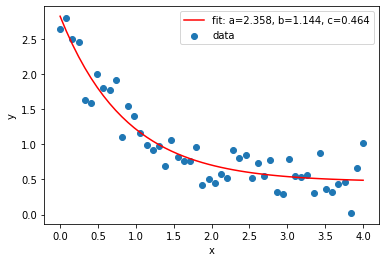

In [406]:
from scipy.optimize import curve_fit

# curve fitting given dataset with only one independent variable
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(374639)
# noise
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.scatter(xdata, ydata, label='data')

popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

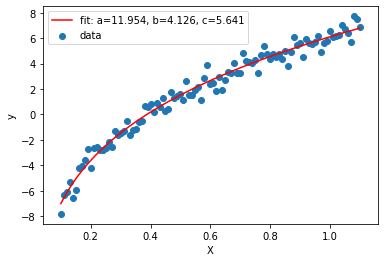

In [460]:
# if we have more than 1 independent variable, the idea is 
# passing a multi-dimensional array for the independent variables

def func(X, a, b, c):
    x,y = X
    return np.log(a) + b*np.log(x) + c*np.log(y)


x = np.linspace(0.1,1.1,101)
y = np.linspace(1.,2., 101)
a, b, c = 10, 4, 6
np.random.seed(374639)
# add artificially noisy data to fit
z = func((x,y), a, b, c) + 0.5 * np.random.normal(size=x.size)

plt.scatter(x,z,label = 'data')

# initial guesses for a,b,c
p0 = 8,2,5
popt, pcov = curve_fit(func, (x,y), z, p0)
plt.plot(x, func((x,y), *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc= 'best')
plt.show()

There are multiple fitting methods available:
   - Linear regression 
   - point-to-point (concatencated linear segements)
   - polynomial regression (such as quadratic regresion, cubic regression or even higer order regression)
   - Non-linear regression (such as a power curve)
   - and user defined regresion  
The upcoming question is how do we know the shape first? If we don't have a clearly understanding about the data, we have to try as many as we can to find the best fitting curve...

**<font color = red>Linear Equation</font>**  
Python has a linar equation solver to help us solve this kind of probelm, but in practice, the dataset we extract from real case can be very compicated, so it might not so helpful...  

In [408]:
# extract data from the first 4 line, try to solve a simple linear equation problem
# if we have a squared matrix on hand  # equations == # variables
A = df.iloc[0:4,:-1]
b = df.iloc[0:4,-1]
cof = np.linalg.solve(A,b)
print(cof)

[ 4.04899893 -1.20900015  5.22046916  8.02670688]


In [409]:
import numpy.linalg as la
import scipy.linalg as spla

In [480]:
A = df.iloc[:,:-1]
b = df.iloc[:,-1]

In [411]:
# if # equations != # variables
x, residuals, rank, s  = np.linalg.lstsq(A,b,rcond=None)
print(x)

[ 0.24515825 -0.0053358   0.05446598  0.10340751]


x is the solution, residual is the sum, rank is the matrix rank of input A, and s the singular values of A. (If b has more than one dimension, lstsq will solve the system corresponding to each column of b)

**<font color = red>Time Series Analysis</font>**   
Time series analysis is a statistical technique that deals with time series data, or trend analysis.  Time series data means that data is in a series of  particular time periods or intervals. A time series can be broken down into 3 components:
   - Trend: Upward & downward movement of the data with time over a large period of time
   - Seasonality: Seasonal variance 
   - Noise: Spikes & troughs at random intervals

What does "stationary" mean?  
   - The mean of the series shouldn't be a function of time
   - The variance of the series shouldn't be a function of time
   - The covariance of the i-th term and the (i+m)-th term shouldn't be a function of time  
   
If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. There are two primary way to determine whether a given time series is stationary:
   - Rolling Statistics: Plot the rolling mean and rolling standard deviation. The time series is stationary if they remain constant with time (with the naked eye look to see if the lines are straight and parallel to the x-axis)
   - The time series is considered stationary if the p-value is low (according to the null hypothesis) and the critical values at 1%, 5%, 10% confidence intervals are as close as possible to the ADF Statistics

In [477]:
# randomly generate a time series data
np.random.seed(374639)
rows,cols = 200,1
data = np.random.rand(rows,cols)
tidx = pd.date_range('2000-01-01', periods=rows, freq='MS') # freq='MS'set the frequency of date in months and start from day 1
df = pd.DataFrame(data, columns=['a'], index=tidx)

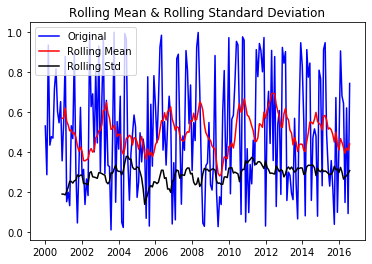

In [478]:
# check if the dataset satisfies the stationarity 
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

From above figure, we can conclude that this dataset is stationary because the mean and the deviation are basically keep the same even it's kinda jagged. And the following codes prove our finding. (P-value is way small than the threshold 0.05 and the ADF statistic is far from the critical values)

In [423]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['a'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -12.674715636766997
p-value: 1.2229019829102384e-23
Critical Values:
	1%: -3.4636447617687436
	5%: -2.8761761179270766
	10%: -2.57457158581854


- **<font color = blue>Autoregressive model</font>**   
An autoregression model is a linear regression model that uses lagged variables as input variables. Autoregressive models operate under the premise that past values have an effect on current values. AR models are commonly used in analyzing nature, economics, and other time-varying processes. As long as the assumption holds, we can build a linear regression model that attempts to predict value of a dependent variable today, given the values it had on previous days.

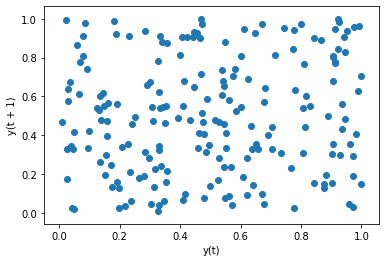

In [421]:
# Check for Autocorrelation
# plot the observation at the previous time step (t-1) 
# with the observation at the next time step (t+1) as a scatter plot.
lag_plot(df)
plt.show()

In [479]:
values = pd.DataFrame(df.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.099723
t+1  0.099723  1.000000


Here we use the Pearson correlation coefficient, as we can see, there exists barly a self-correlation...

Lag: 14
Coefficients: [ 0.64759003  0.12431961 -0.02127673 -0.09303362  0.06170445  0.02062176
 -0.05756763  0.02450127 -0.15113385 -0.05285899 -0.03019373 -0.05457781
  0.01818895 -0.06571293 -0.03406585]
predicted=0.36529893205004654, expected=[0.67178442]
predicted=0.4455931766637503, expected=[0.09693184]
predicted=0.5019612241474218, expected=[0.42213378]
predicted=0.43292996007697415, expected=[0.90523847]
predicted=0.5266761894070623, expected=[0.67994174]
predicted=0.54294638127523, expected=[0.64224375]
predicted=0.5232694098950695, expected=[0.14624157]
predicted=0.5738088389026704, expected=[0.61982861]
predicted=0.564424328308837, expected=[0.09083163]
predicted=0.5696661281313947, expected=[0.74221494]
Test MSE: 0.0876627074213536


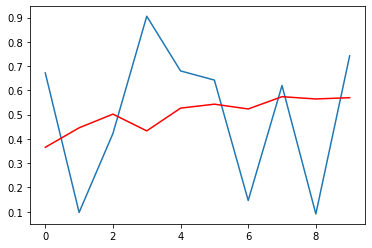

In [482]:
# build a AR model to illustrate the idea
from statsmodels.tsa.ar_model import AR

X = df.values
train, test = X[0:len(X)-10], X[len(X)-10:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag:', model_fit.k_ar) # best lag model gonna take 
print('Coefficients:', model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted={}, expected={}'.format(predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE:',error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

- **<font color = blue>Autoregressive Moving Average Model</font>**   
Autoregressive Moving Average models provide a parsimonious description of a stationary stochastic process in terms of two polynomials, one for the autoregression (AR) and the second for the moving average (MA). Compared with the AR model we described before, The moving average (MA) method models the next step in the sequence as a linear function of the residual errors from a mean process at prior time steps.  
Back to the ARMA model, the model is usually referred to as the ARMA(p,q) where p is the order (number of time lags) of the AR part and q is the order of the MA part.

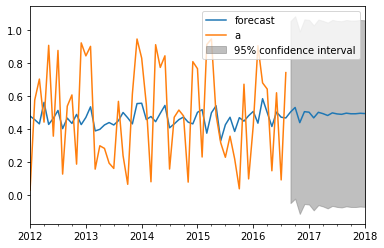

In [425]:
from statsmodels.tsa.arima_model import ARMA

data = df['a']
# fit model
mod = ARMA(data, order=(3, 3)) # if we set p == 0, then it becomes a simple MA model
res = mod.fit(disp=False)
# make prediction
res.plot_predict(start = '2012-01-01', end ='2018-01-01')
plt.show()

- **<font color = blue>Autoregressive Integrated Moving Average Model</font>**   
The ARIMA (aka Box-Jenkins) model adds differencing to an ARMA model. Differencing subtracts the current value from the previous and can be used to transform a time series into one that’s stationary. For example, first-order differencing addresses linear trends, and employs the transformation zi = yi — yi-1. Second-order differencing addresses quadratic trends and employs a first-order difference of a first-order difference, namely zi = (yi — yi-1) — (yi-1 — yi-2), and so on. So, dataset that will be used on this model can be unstationnary.

predicted=[0.43600423], expected=[0.67178442]
predicted=[0.53971746], expected=[0.09693184]
predicted=[0.46695373], expected=[0.42213378]
predicted=[0.43730743], expected=[0.90523847]
predicted=[0.57105673], expected=[0.67994174]
predicted=[0.52496555], expected=[0.64224375]
predicted=[0.48538965], expected=[0.14624157]
predicted=[0.46968681], expected=[0.61982861]
predicted=[0.54768628], expected=[0.09083163]
predicted=[0.5022816], expected=[0.74221494]
Test MSE: 0.09020779724264227


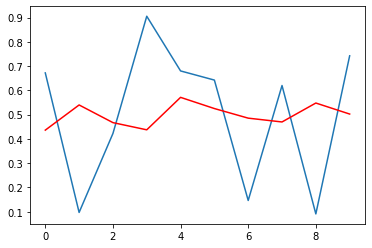

In [427]:
X = df.values
train, test = X[0:len(X)-10], X[len(X)-10:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted={}, expected={}'.format(yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE:',error)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

 **<font color = red>Neural Network</font>**   
A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.  
It's powerful:
- Neural networks are flexible and can be used for both regression and classification problems. Any data which can be made numeric can be used in the model, as neural network is a mathematical model with approximation functions.
- Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features.
- Trainning may time-consuming but once trained, the predictions are pretty fast.
- Neural networks can be trained with any number of inputs and layers.
- The larger training set we have, usually the better model we gonna get.

But it also has some drawbacks:
- Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables. （This one hurts most, because our goal is finding the potential underlaying relationship...)
- It is computationally very expensive and time consuming to train with traditional CPUs.
- Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

In [475]:
# data preparation

np.random.seed(374639) 
df = pd.DataFrame(np.random.randint(0,1000,size = (1000,10)),columns=list('ABCDEFGHIJ'))
dataset = df.values
X = dataset[:,0:9] # input features
Y = dataset[:,9] # target
min_max_scaler = preprocessing.MinMaxScaler() # normalization by using min-max
X_scale = min_max_scaler.fit_transform(X) 
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) 
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) # split in further to get test dataset and validation dataset
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(700, 9) (150, 9) (150, 9) (700,) (150,) (150,)


In [470]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import keras

In [471]:
# first layer as a dense layer with 50 neuron and input shape as 9 since we have 9 input feature
# second layer as a dense layer with 50 neruron also
# and third layer is a dense layer with 1 neuron
# activation function are as described
# model = Sequential([Dense(32, activation='relu', input_shape=(9,)),
#                      Dense(1, activation='sigmoid')])

model = Sequential()
model.add(Dense(input_dim = 9, activation= 'relu',units= 50))
model.add(Dense(activation = 'relu', units= 50))
model.add(Dense(activation = 'relu', units= 1))
# model configuration
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanSquaredError()])
# model training
hist = model.fit(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))


Train on 700 samples, validate on 150 samples
Epoch 1/100
700/700 [==============================] - 0s 220us/step - loss: 322718.1845 - mean_squared_error: 322718.1562 - val_loss: 345541.0146 - val_mean_squared_error: 345541.0000
Epoch 2/100
700/700 [==============================] - 0s 49us/step - loss: 321145.4300 - mean_squared_error: 321145.4375 - val_loss: 343140.8000 - val_mean_squared_error: 343140.8125
Epoch 3/100
700/700 [==============================] - 0s 48us/step - loss: 317188.2073 - mean_squared_error: 317188.2188 - val_loss: 337002.4350 - val_mean_squared_error: 337002.4375
Epoch 4/100
700/700 [==============================] - 0s 49us/step - loss: 308013.3939 - mean_squared_error: 308013.4062 - val_loss: 323943.0137 - val_mean_squared_error: 323943.0312
Epoch 5/100
700/700 [==============================] - 0s 45us/step - loss: 290779.3528 - mean_squared_error: 290779.3750 - val_loss: 301558.5062 - val_mean_squared_error: 301558.5000
Epoch 6/100
700/700 [============

In [472]:
model.evaluate(X_test, Y_test)[1]

150/150 [==============================] - 0s 25us/step


89392.15625

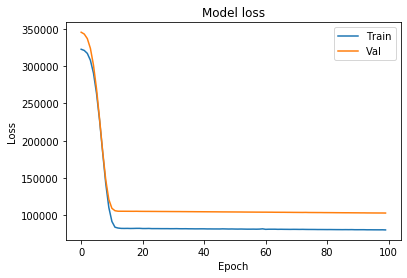

In [473]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()